In [266]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [267]:
df=pd.read_csv('train.csv')

In [268]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [269]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is called df

# Extract Title from Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                   'Don', 'Dr', 'Major', 'Rev', 'Sir',
                                   'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Create FamilySize and IsAlone
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


# Create AgeGroup
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], 
                        labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior'])


<>:8: SyntaxWarning: invalid escape sequence '\.'
<>:8: SyntaxWarning: invalid escape sequence '\.'
C:\Users\TUSHAR GUPTA\AppData\Local\Temp\ipykernel_23608\669094344.py:8: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [270]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,YoungAdult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,YoungAdult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,YoungAdult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,YoungAdult


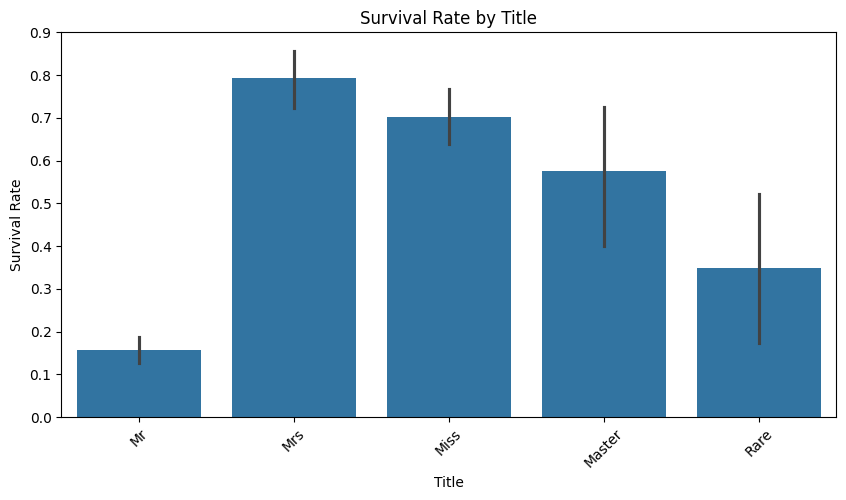

In [271]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Title', y='Survived')
plt.title('Survival Rate by Title')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.show()


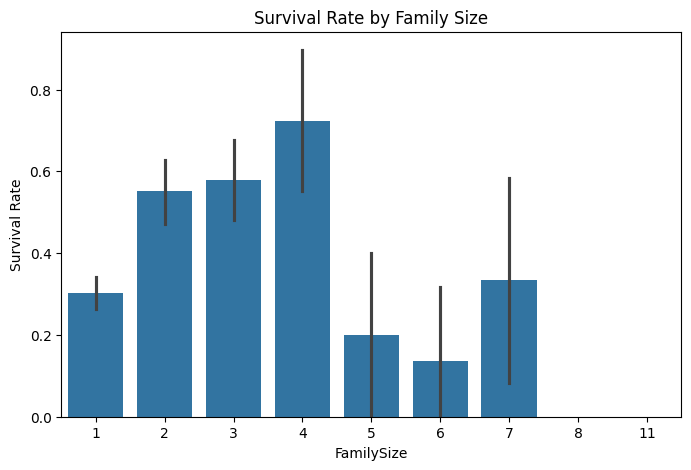

In [272]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='FamilySize', y='Survived')
plt.title('Survival Rate by Family Size')
plt.ylabel('Survival Rate')
plt.show()


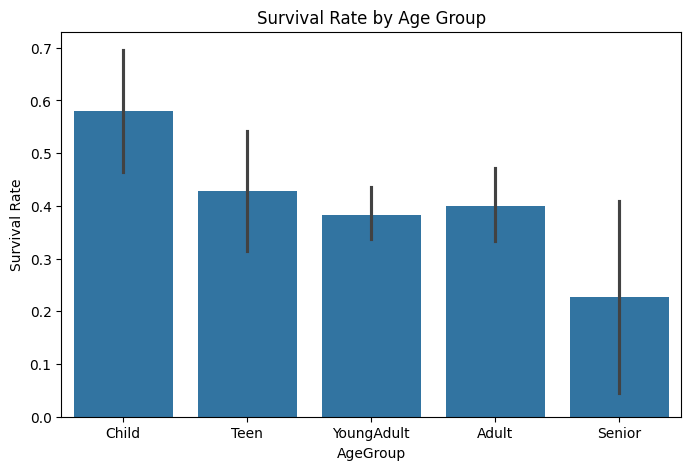

In [273]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='AgeGroup', y='Survived', order=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior'])
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.show()


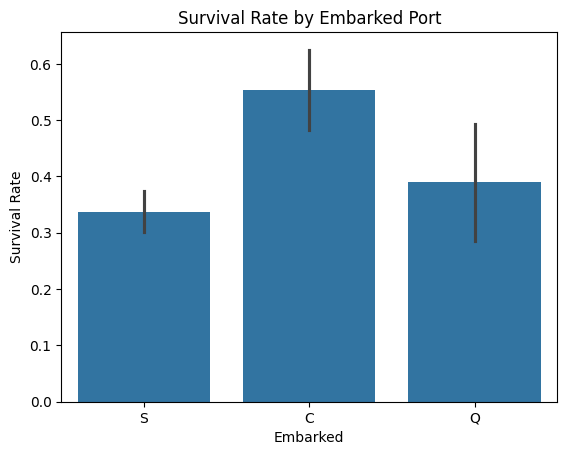

In [274]:
import seaborn as sns

# If you have original train dataframe with 'Embarked' and 'Survived'
sns.barplot(data=df, x='Embarked', y='Survived')
plt.title('Survival Rate by Embarked Port')
plt.ylabel('Survival Rate')
plt.show()


In [275]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'], axis=1, inplace=True)


In [276]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,AgeGroup
0,0,3,male,22.0,7.2500,S,Mr,2,YoungAdult
1,1,1,female,38.0,71.2833,C,Mrs,2,Adult
2,1,3,female,26.0,7.9250,S,Miss,1,YoungAdult
3,1,1,female,35.0,53.1000,S,Mrs,2,YoungAdult
4,0,3,male,35.0,8.0500,S,Mr,1,YoungAdult


In [277]:
df.isnull().sum()


Survived        0
Pclass          0
Sex             0
Age           177
Fare            0
Embarked        2
Title           0
FamilySize      0
AgeGroup      177
dtype: int64

In [278]:
df['Age'] = df.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18,  60, 100],
                        labels=['Child', 'Teen', 'Adult', 'Senior'])
df['Embarked'].fillna('S', inplace=True)  # Most common value


C:\Users\TUSHAR GUPTA\AppData\Local\Temp\ipykernel_23608\1250542642.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S', inplace=True)  # Most common value


In [279]:
df.isnull().sum()


Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
Title         0
FamilySize    0
AgeGroup      0
dtype: int64

In [280]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [281]:
df['Title'].value_counts()

Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64

In [282]:
import pandas as pd

# 1. Label encode binary categorical variable: Sex
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


# 3. One-hot encode Embarked (drop_first=True avoids dummy variable trap)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True, dtype=int)

# 4. One-hot encode Title
df = pd.get_dummies(df, columns=['Title'], drop_first=True, dtype=int)

# 5. One-hot encode AgeGroup
df = pd.get_dummies(df, columns=['AgeGroup'], drop_first=True, dtype=int)



In [283]:
df.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,AgeGroup_Teen,AgeGroup_Adult,AgeGroup_Senior
0,0,3,0,22.0,7.2500,2,0,1,0,1,0,0,0,1,0
1,1,1,1,38.0,71.2833,2,0,0,0,0,1,0,0,1,0
2,1,3,1,26.0,7.9250,1,0,1,1,0,0,0,0,1,0
3,1,1,1,35.0,53.1000,2,0,1,0,0,1,0,0,1,0
4,0,3,0,35.0,8.0500,1,0,1,0,1,0,0,0,1,0


In [284]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [285]:
df=pd.read_csv('test.csv')

# Extract Title from Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                   'Don', 'Dr', 'Major', 'Rev', 'Sir',
                                   'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Create FamilySize and IsAlone
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


# Create AgeGroup
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], 
                        labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior'])

df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'], axis=1, inplace=True)

df['Age'] = df.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 60, 100],
                        labels=['Child', 'Teen','Adult', 'Senior'])
df['Embarked'].fillna('S', inplace=True)  # Most common value


import pandas as pd

# 1. Label encode binary categorical variable: Sex
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


# 3. One-hot encode Embarked (drop_first=True avoids dummy variable trap)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True, dtype=int)

# 4. One-hot encode Title
df = pd.get_dummies(df, columns=['Title'], drop_first=True, dtype=int)

# 5. One-hot encode AgeGroup
df = pd.get_dummies(df, columns=['AgeGroup'], drop_first=True, dtype=int)



<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
C:\Users\TUSHAR GUPTA\AppData\Local\Temp\ipykernel_23608\894181.py:4: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
C:\Users\TUSHAR GUPTA\AppData\Local\Temp\ipykernel_23608\894181.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S', inplace=True)  # Most common value


In [286]:
df.head()

,Pclass,Sex,Age,Fare,FamilySize,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,AgeGroup_Teen,AgeGroup_Adult,AgeGroup_Senior
0,3,0,34.5,7.8292,1,1,0,0,1,0,0,0,1,0
1,3,1,47.0,7.0000,2,0,1,0,0,1,0,0,1,0
2,2,0,62.0,9.6875,1,1,0,0,1,0,0,0,0,1
3,3,0,27.0,8.6625,1,0,1,0,1,0,0,0,1,0
4,3,1,22.0,12.2875,3,0,1,0,0,1,0,0,1,0


In [287]:
X_test = df

In [288]:
param_grid = {
    'max_depth': [2,3,4,5,6,7],
    'learning_rate': [ 0.1, 0.2],
    'n_estimators': [25,50,100,150],
    'subsample': [0.6,0.8,1],
    'colsample_bytree': [0.6,0.8,1],
    #'min_child_weight':[1,3,5,10],
    #'gamma':[0,0.2,0.3,1,3]
}


In [289]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
xgmodel=XGBClassifier()
grid_search = GridSearchCV(estimator=xgmodel,
                           param_grid=param_grid,
                           scoring='accuracy',        # or 'roc_auc' or 'average_precision'
                           cv=5                      # 5-fold cross-validation
                          )                

grid_search.fit(X_train,y_train)
y_pred = grid_search.predict(X_val)


In [290]:
grid_search.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.2,
 'max_depth': 5,
 'n_estimators': 25,
 'subsample': 0.8}

In [291]:
from sklearn.metrics import accuracy_score,classification_report
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Accuracy: 0.8324022346368715
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       105
           1       0.82      0.76      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [292]:
y_pred_test = grid_search.predict(X_test)

In [293]:
y_pred_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [294]:
df=pd.read_csv('test.csv')
submission = pd.DataFrame({
    'PassengerId': df['PassengerId'],
    'Survived': y_pred_test
})

submission.to_csv('submission_women_survive.csv', index=False)


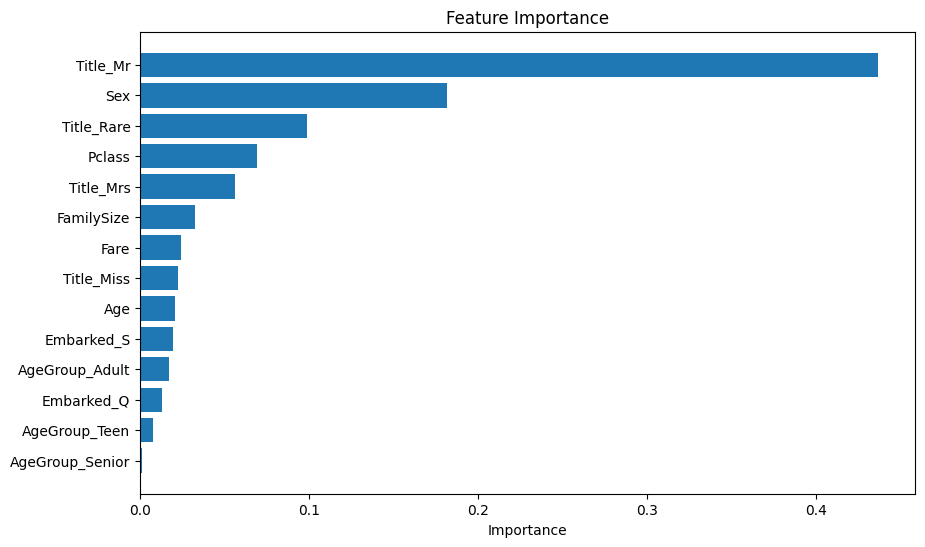

In [295]:
import pandas as pd
import matplotlib.pyplot as plt

best_model = grid_search.best_estimator_
# If you've already trained a model like RandomForestClassifier
importances = best_model.feature_importances_
features = X.columns

# Create a DataFrame and sort
feat_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_importance = feat_importance.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(feat_importance['Feature'], feat_importance['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.show()
